** Reconstructing a periodic signal**

In this paper, we will try to reconstruct a positive square wave, so we first need to find the Fourier series coefficients of a square wave signal as seen below that has T = 4 seconds  , so the frequency  is 0.25 and A = 2

a positive square wave


![alt text](https://www.electronics-tutorials.ws/waveforms/tim3.gif)

In our case the square wave has a cycle in every 4 second, so will consider this as 2π. And the half cycle is  π. That because we need to standardize the cycle of all the signals when we attempt to reconstruct the original signal.

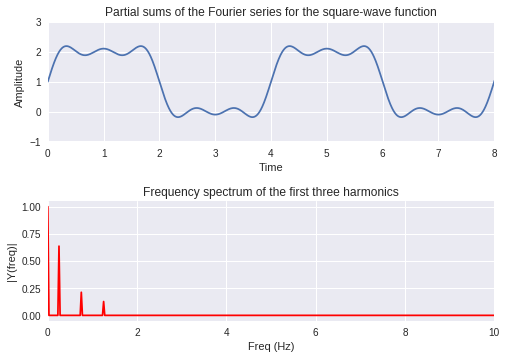

In [1]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np

Fs = 160.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,40,Ts) # time from 0 to 40 second

fk = 0.25;   # frequency of the signal

# Dc componant
a0 = 1 + (0 * t) # unit step function, Dc fundamental
X = a0
# sine wave n > 1

dh = 6 # the number of harmonic signals

for i in range(1, dh, 2):   # strting from 1st harmonic until dh-1 harmonic, where 2 is to jump the even number 2,4,6,...
  
  x = (4/(i* np.pi)) *  np.sin(2*np.pi* i * fk*t)
  X = X + x
  


# To Find the signals, we have three scenarios which are:
# 1- For just Dc fundamental where dh-1 = 0, y = a0
# 2- After adding the next three harmonic where dh-1 = 1,3,5
# 3- Adding enough harmonic to reach to the approximate original signal,
#     where dh-1 = 999



y = X

n = len(y) # length of the signal
k = np.arange(n) # index of data sampling 
T = n/Fs # how many second which is clearly 40 as it's in line 6

frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Z = np.fft.fft(y)/n # fft computing and normalization
Y = Z[range(n//2)]

plt.subplot(2, 1, 1)
plt.plot(t,y)
plt.title('Partial sums of the Fourier series for the square-wave function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim(-1,3)
plt.xlim(0,8)

plt.subplot(2, 1, 2)
plt.plot(frq,abs(Y),'r') # plotting the spectrum
plt.title('Frequency spectrum of the first three harmonics')
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim(0,10)

plt.subplots_adjust(hspace=0.5)
plt.show()


(0, 4)

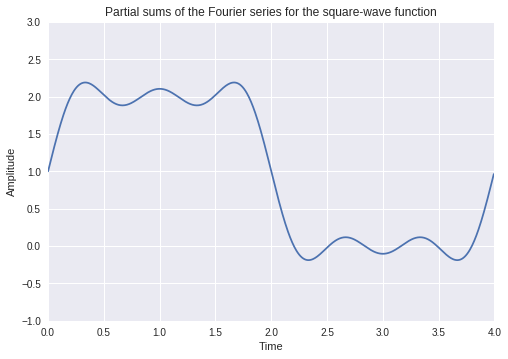

In [60]:
# extract one cycle of the reconstructed signal 4 second
q = 160 * 4
W = y[range(q)] # a one cycle of the reconstructed signal
t = np.arange(0,4,Ts)
plt.plot(t,W)
plt.title('Partial sums of the Fourier series for the square-wave function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim(-1,3)
plt.xlim(0,4)

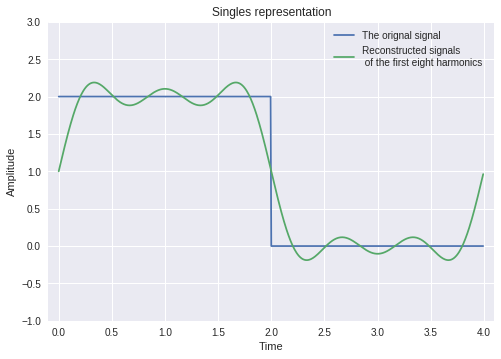

In [67]:
# create a squer wave signal
from scipy import signal
import matplotlib.pyplot as plt
#t = np.linspace(0, 4, Fs, endpoint=False)
Ux = signal.square(2 * np.pi * 0.25 * t) + 1  # The orignal signal, a squer wave has a frequncy of 0.25

Ux = Ux[range(q)]

plt.plot(t, Ux, t, W)
plt.ylim(-1, 3)
plt.xlim(-0.1,4.1)
plt.title('Singles representation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(('The orignal signal', 'Reconstructed signals \n of the first eight harmonics '),loc='upper right')

In [68]:
# chech lenght of Ux
r = len(Ux)
print (r) # lenght orignal signal
print (q) # lenght reconstructed signal

if r != q:
  print("There is a problem, the both signals don't have the same length")
  
else:
    print('Okay, the both signals has the same length')

640
640
Okay, the both signals has the same length


In [69]:
# the error between the original signal and the Fourier series for one cycle
rms = np.sqrt(np.mean((Ux-W)**2))
print 'The error between the original signal and the Fourier series for one cycle is' , rms

The error between the original signal and the Fourier series for one cycle is 0.25881178678552036
